In [3]:
#Importing libraries

import pandas as pd
import numpy as np
from bokeh.plotting import ColumnDataSource
from bokeh.models import HoverTool
from bokeh.io import curdoc
from bokeh.layouts import widgetbox, row, column
from bokeh.models import Slider, Select, ColumnDataSource, CategoricalColorMapper, CustomJS
from bokeh.plotting import figure, show
from bokeh.palettes import viridis
from bokeh.models import Slider

In [4]:
#Importing and processing data file
crop = pd.read_csv('C:\\Users\\mdkum\\OneDrive\\Documents\\Data Science\\Dataset\\data.world\\crop_production.csv')
#crop_tn = pd.read_csv('C:\\Users\\mdkum\\OneDrive\\Documents\\Data Science\\Dataset\\data.world\\crop_production_tn.csv')

In [5]:
#Cleaning Data
crop.fillna(np.NaN)
crop['Season'] = crop.Season.str.strip() #Removing Whitespace

In [6]:
#Filtering the dataset by Season
crop_season = crop[(crop.Season == 'Whole Year') & (crop.Crop!='Coconut ') & (crop.Crop !='Pulses total') & (crop.Crop !='Total foodgrain')]
#crop_season = crop_season[crop_season.Crop != 'Coconut ']
crop_crop = crop_season.groupby(['Crop', 'Crop_Year']).mean().round(1)
crop_year = crop_season.groupby(['Crop_Year']).mean().round(1)

#crop_crop = crop_season.groupby(['State_Name', 'Crop', 'Crop_Year']).sum().round(1)


In [7]:
crop_season[(crop_season.Crop=='Garlic') & (crop_season.State_Name == 'Tamil Nadu')].groupby(['District_Name']).Production.mean().sort_values(ascending=False).round().plot(kind='bar', title='Crop Production by State', figsize=(15,5))

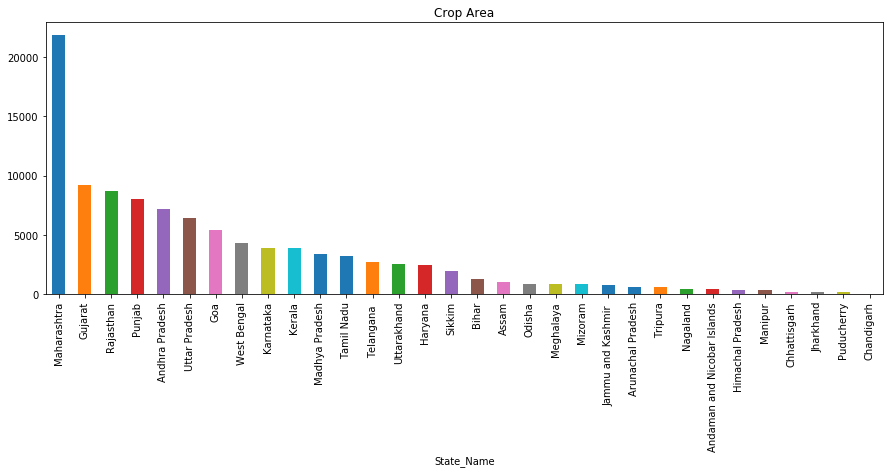

In [20]:
crop_state = crop_season.groupby(['State_Name']).Area.mean().round().sort_values(ascending=False).plot(kind='bar', title='Crop Area', figsize=(15,5))

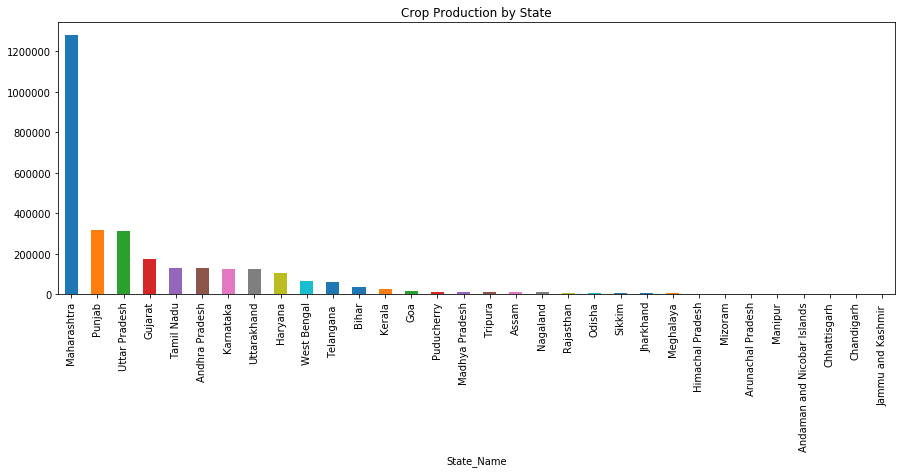

In [16]:
crop_state = crop_season.groupby(['State_Name']).Production.mean().round().sort_values(ascending=False).plot(kind='bar', title='Crop Production by State', figsize=(15,5))

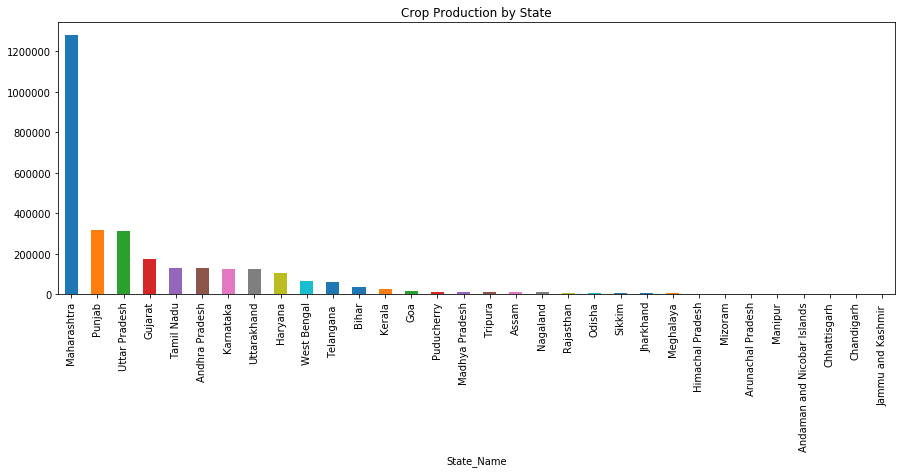

In [8]:
crop_state = crop_season.groupby(['State_Name']).Production.mean().round().sort_values(ascending=False).plot(kind='bar', title='Crop Production by State', figsize=(15,5))

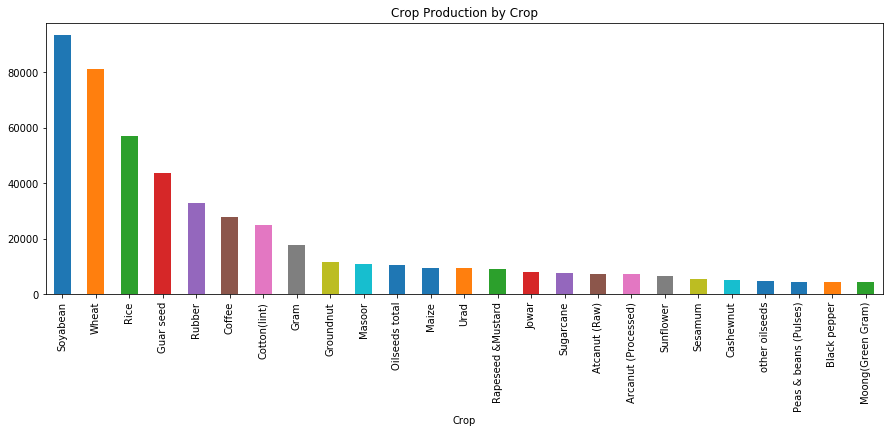

In [52]:
crop_state = crop_season.groupby(['Crop']).Area.mean().round().sort_values(ascending=False).head(25).plot(kind='bar', title='Crop Production by Crop', figsize=(15,5))

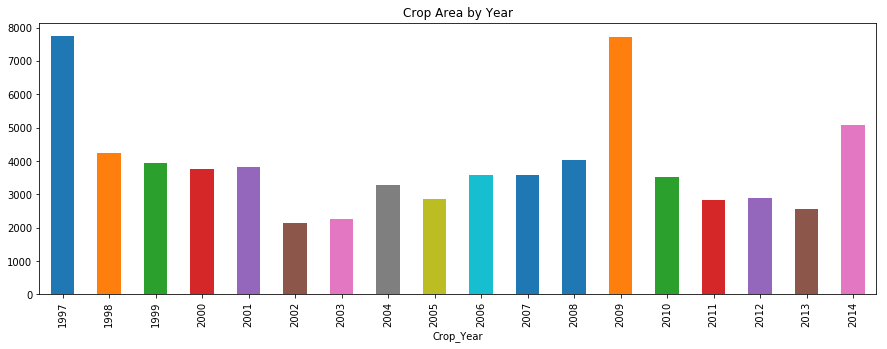

In [50]:
crop_state = crop_season.groupby(['Crop_Year']).Area.mean().round().plot(kind='bar', title='Crop Area by Year', figsize=(15,5))

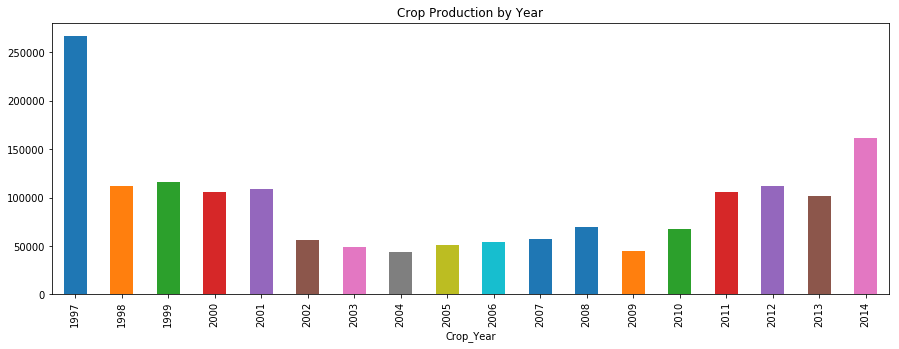

In [9]:
crop_state = crop_season.groupby(['Crop_Year']).Production.mean().round().plot(kind='bar', title='Crop Production by Year', figsize=(15,5))

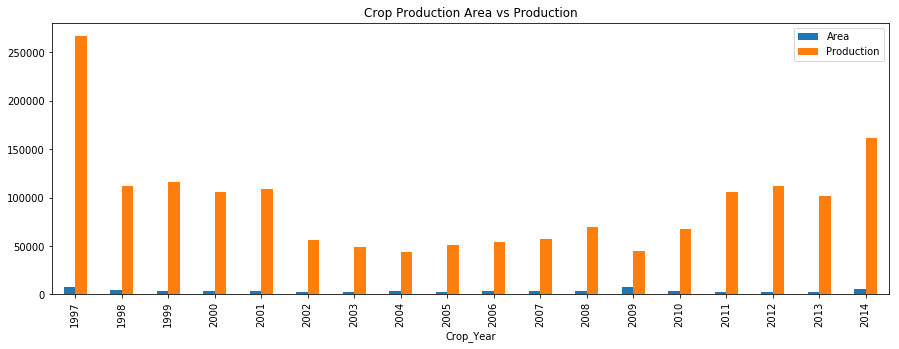

In [11]:
crop_state = crop_season.groupby(['Crop_Year']).mean().round().plot(kind='bar', title='Crop Production Area vs Production', figsize=(15,5))

In [695]:
#Creating Column Data Source
source = ColumnDataSource(data={
    'x'        : crop_dt[crop_dt.loc[(['Tamil Nadu']), :].Area,
    'y'        : crop_dt[crop_dt.index.get_level_values('Crop_Year')==2005].loc[(['Tamil Nadu']), :].Production,
    'state'    : crop_dt[crop_dt.index.get_level_values('Crop_Year')==2005].loc[(['Tamil Nadu']), :].index.get_level_values('State_Name'),
    'crop'     : crop_dt[crop_dt.index.get_level_values('Crop_Year')==2005].loc[(['Tamil Nadu']), :].index.get_level_values('District_Name')
})

In [696]:
#Creating color palette for plot
district_list = crop_dt.loc[(['Tamil Nadu']), :].index.get_level_values('District_Name').unique().tolist()
call_colors = viridis(len(district_list))
color_mapper = CategoricalColorMapper(factors=district_list, palette=call_colors)

In [697]:
# Creating the figure
#xmin, xmax = min(data.Crop_Year), max(data.Crop_Year)
#ymin, ymax = min(data.Production), max(data.Production)
p = figure(
    title = 'Crop Area vs Production',
    x_axis_label = 'Area',
    y_axis_label = 'Production',
    plot_height=900, 
    plot_width=1200,
    tools = [HoverTool(tooltips='@district')]
          )
p.circle(x='x', y='y', source=source, size=12, alpha=0.7, 
         color=dict(field='district', transform=color_mapper),
         legend='district')
p.legend.location = 'top_right'
#show(p)

In [700]:
#Creating Slider for Year
start_yr = min(crop_dt.index.get_level_values('Crop_Year'))
end_yr = max(crop_dt.index.get_level_values('Crop_Year'))
slider = Slider(start=start_yr, end=end_yr, step=1, value=start_yr, title='Year')
slider.on_change('value',update_plot)

In [706]:
layout = row(widgetbox(slider), p)
curdoc().add_root(layout)
show(layout)

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: District_Name [renderer: GlyphRenderer(id='725f9bf3-43d0-49c3-a1ae-b23c4e98ed12', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: District_Name [renderer: GlyphRenderer(id='f32497fa-f39f-44e3-a5c1-14d95b2a7b39', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: District_Name [renderer: GlyphRenderer(id='83f885d5-5789-407a-9675-aa225d038b05', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: District_Name [renderer: GlyphRenderer(id='a39245d4-3a84-4eae-8b38-b37541d3934b', ...)]
